# Data Set

COVID-19 Open Research Dataset Challenge (CORD-19)

## 1. Ön Koşullar Kurulum ve Gerekli kitaplıkları içe aktarma

In [1]:
import datetime
currentDT = datetime.datetime.now()
print ("Execution Start time : " , str(currentDT))


Execution Start time :  2022-01-06 16:45:18.992854


In [2]:
!pip install wordcloud

In [3]:
!pip install stop_words

In [4]:
!pip install pyLDAvis

In [5]:
!pip install gensim

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

import plotly.figure_factory as ff
import re

In [7]:
from pathlib import Path # required for getting the path of the current directory
import glob #required to acLcess all files of same type inside a directory
import os  #required for accessing files at a path
import json # required for working with json files
import csv
import fnmatch
import nltk 
from nltk.corpus import stopwords 
from wordcloud import WordCloud


## 2. Veri kümesini yükleyin

In [8]:
docmetadata= pd.read_csv("C:\\Users\\yasin\\OneDrive\\Masaüstü\\metadata.csv")

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
docmetadata.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


## 3. Veri Analizi

In [12]:
simple_schema = ['cord_uid','source_x', 'title', 'abstract', 'authors', 'url']
def make_clickable(address):
    '''Make the url clickable'''
    return '<a href="{0}">{0}</a>'.format(address)

def preview(text):
    '''Show only a preview of the text data.'''
    return text[:30] + '...'

format_ = {'title': preview, 'abstract': preview, 'authors': preview, 'url': make_clickable}

docmetadata[simple_schema].head(5).style.format(format_)


,cord_uid,source_x,title,abstract,authors,url
0,ug7v899j,PMC,Clinical features of culture-p...,OBJECTIVE: This retrospective ...,"Madani, Tariq A; Al-Ghamdi, Ai...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC35282/
1,02tnwd4m,PMC,Nitric oxide: a pro-inflammato...,Inflammatory diseases of the r...,"Vliet, Albert van der; Eiseric...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC59543/
2,ejv2xln0,PMC,Surfactant protein-D and pulmo...,Surfactant protein-D (SP-D) pa...,"Crouch, Erika C...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC59549/
3,2b73a28n,PMC,Role of endothelin-1 in lung d...,Endothelin-1 (ET-1) is a 21 am...,"Fagan, Karen A; McMurtry, Ivan...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC59574/
4,9785vg6d,PMC,Gene expression in epithelial ...,Respiratory syncytial virus (R...,"Domachowske, Joseph B; Bonvill...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC59580/


In [13]:
print("Metadata excel verisindeki makale sayısı : " , len(docmetadata))

Metadata excel verisindeki makale sayısı :  866605


In [14]:
docmetadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866605 entries, 0 to 866604
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          866605 non-null  object 
 1   sha               293894 non-null  object 
 2   source_x          866605 non-null  object 
 3   title             866168 non-null  object 
 4   doi               489751 non-null  object 
 5   pmcid             305461 non-null  object 
 6   pubmed_id         390515 non-null  object 
 7   license           866605 non-null  object 
 8   abstract          653755 non-null  object 
 9   publish_time      866369 non-null  object 
 10  authors           846465 non-null  object 
 11  journal           809253 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  400429 non-null  object 
 14  arxiv_id          11489 non-null   object 
 15  pdf_json_files    293894 non-null  object 
 16  pmc_json_files    24

In [15]:
#Meta veri veri kümesinde boş değerler olup olmadığını kontrol edin
docmetadata.isnull().sum()

cord_uid                 0
sha                 572711
source_x                 0
title                  437
doi                 376854
pmcid               561144
pubmed_id           476090
license                  0
abstract            212850
publish_time           236
authors              20140
journal              57352
mag_id              866605
who_covidence_id    466176
arxiv_id            855116
pdf_json_files      572711
pmc_json_files      622953
url                 349818
s2_id                66439
dtype: int64

<AxesSubplot:>

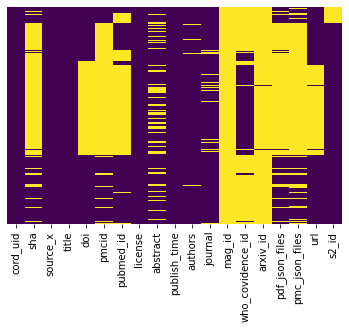

In [16]:
sns.heatmap(docmetadata.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [17]:
#Farklı kaynaklardan makalelerin sayısını kontrol etme
docmetadata['source_x'].value_counts()

WHO                                    386816
Medline; PMC                           127772
Medline                                120882
PMC                                     66439
Elsevier; Medline; PMC                  48173
Medline; PMC; WHO                       35153
Medline; WHO                            18873
MedRxiv; WHO                            12326
ArXiv                                   10871
Elsevier; Medline; PMC; WHO             10844
Elsevier; PMC                            8059
Elsevier; PMC; WHO                       3774
MedRxiv                                  3584
PMC; WHO                                 3251
BioRxiv; WHO                             3085
BioRxiv                                  2958
MedRxiv; Medline; PMC; WHO                807
BioRxiv; Medline; PMC; WHO                557
MedRxiv; Medline; WHO                     352
BioRxiv; Medline; WHO                     339
Elsevier                                  329
BioRxiv; MedRxiv                  

In [14]:
docmetadata['abstract'].describe(include='all')

count                                                653755
unique                                               570468
top       An amendment to this paper has been published ...
freq                                                    201
Name: abstract, dtype: object

In [15]:
docmetadata.drop_duplicates(['abstract'], inplace=True)
docmetadata['abstract'].describe(include='all')

count                                                570468
unique                                               570468
top       OBJECTIVE: This retrospective chart review des...
freq                                                      1
Name: abstract, dtype: object

### 3. Makalelerdeki kelime sayısını görselleştirelim

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='abstract_words', ylabel='Density'>

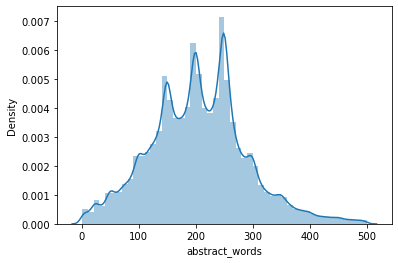

In [18]:
def abstract_len(a):
    if type(a) is str:
        return len(a.split())
    else:
        return 0

docmetadata["abstract_words"] = docmetadata["abstract"].apply(abstract_len)
num_of_word = docmetadata.query("abstract_words != 0 and abstract_words <500")["abstract_words"]

sns.distplot(num_of_word)

### Yayınlanan yıla göre makale sayısını kontrol edelim

In [19]:
docmetadata['publish_time'].describe()

count     866369
unique      7874
top         2021
freq      206058
Name: publish_time, dtype: object

[Text(-20.0, 0, '2005'),
 Text(0.0, 0, '1825'),
 Text(20.0, 0, '1900'),
 Text(40.0, 0, '1940'),
 Text(60.0, 0, '1963'),
 Text(80.0, 0, '1983'),
 Text(100.0, 0, '2003'),
 Text(120.0, 0, '2024'),
 Text(140.0, 0, '')]

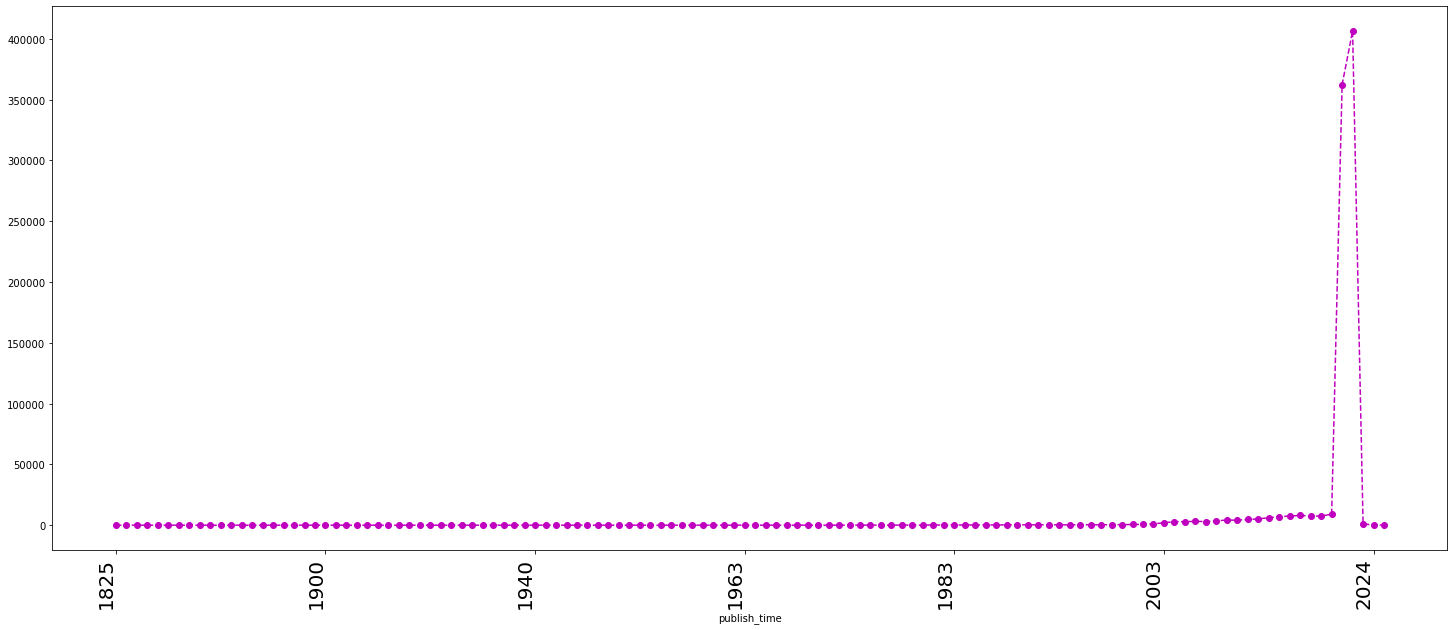

In [20]:
def get_year(dt):
    dt=str(dt)
    year= dt.split('-')
    return year[0]

#Check the count of articles published by year in this dataset
plt.figure(figsize=(25,10))
#domainplot= sns.countplot(yearvise_articles)
#docmetadata.groupby(docmetadata['publish_time'].apply(get_year))['cord_uid'].count().sort_values(ascending=False).head(20)
domainplot=docmetadata.groupby(docmetadata['publish_time'].apply(get_year))['cord_uid'].count().plot(linestyle='--', marker='o', color='m')
domainplot.set_xticklabels(domainplot.get_xticklabels(),rotation=90, ha="right",fontsize=20)

### COVID, SARS, MERS için verileri bölerek keşfedelim

Analiz ağırlıklı olarak COVID-19 hastaları için kullanılan tedavi yöntemlerine odaklandığından, 
makalelere yayınlanma tarihlerine göre bazı filtreler uygulayabiliriz.
WHO, wikipedia ve diğer kaynaklara göre geçtiğimiz yüzyılda benzer salgınlar yaşandı.

Aramamızı korona ile ilgili salgınlarla sınırlandırırsak, o zaman iki tane daha var - SARS-CoV ve MERS-CoV

a. Verileri 2019 ve 2021'deki makale yayın tarihlerine göre filtreleme.

In [21]:
Covid19_2019_2021 = docmetadata[docmetadata['publish_time'].str.contains('2019') | docmetadata['publish_time'].str.contains('2021')]  
Covid19_2019_2021.name="Covid 19 Corona - 2019 ,2021"

b. 2002-2004 SARS-CoV yılları için verileri filtreleme

In [22]:
SARS_2002_TO_2004 = docmetadata[docmetadata['publish_time'].str.contains('2002') | docmetadata['publish_time'].str.contains('2003')| docmetadata['publish_time'].str.contains('2004')]  
SARS_2002_TO_2004.name="SARS - 2002 to 2004"

C. 2012 - 2014 MERS-CoV yılları için verileri filtreleme

In [23]:
MERS_2012_TO_2014 = docmetadata[docmetadata['publish_time'].str.contains('2012') | docmetadata['publish_time'].str.contains('2013')| docmetadata['publish_time'].str.contains('2014')]  
MERS_2012_TO_2014.name="MERS - 2012 to 2014"

In [24]:
print(Covid19_2019_2021['publish_time'].describe())
print(SARS_2002_TO_2004['publish_time'].describe())
print(MERS_2012_TO_2014['publish_time'].describe())

count     415583
unique       720
top         2021
freq      206058
Name: publish_time, dtype: object
count     5952
unique     699
top       2004
freq      1241
Name: publish_time, dtype: object
count     18236
unique     1054
top        2014
freq       3724
Name: publish_time, dtype: object


In [25]:
lst_Pandemic_Datasets=[Covid19_2019_2021,SARS_2002_TO_2004,MERS_2012_TO_2014]

Artık meta veri setimizi COVID 19, SARS, MERS olmak üzere üç kategoride filtreledik.

Aşağıda tüm bu veri setlerinde en çok kullanılan kelimelerin neler olduğuna makalelerin başlıkları ve özetleri açısından bakacağız.

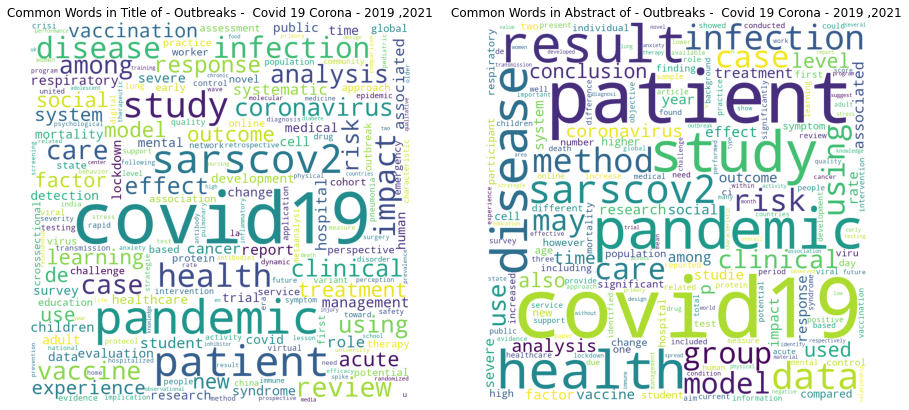

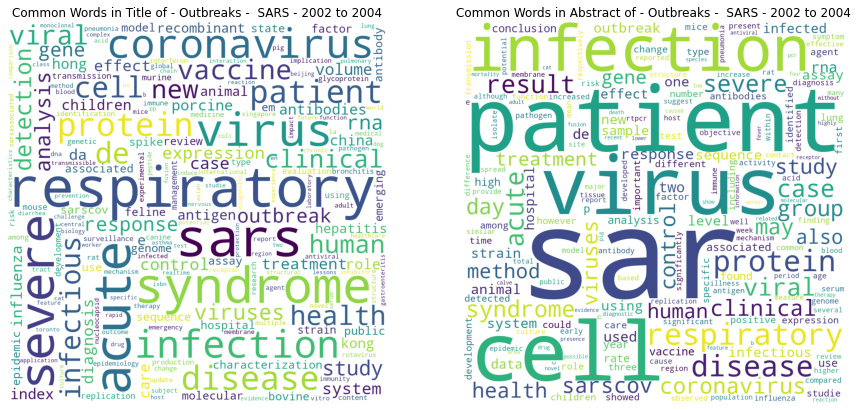

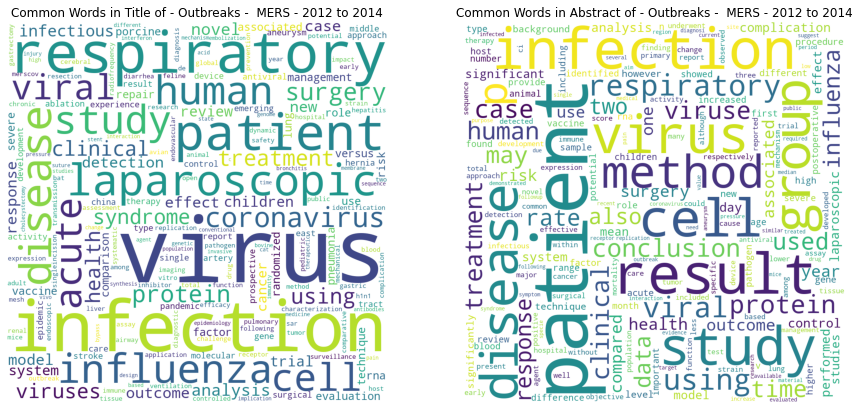

In [26]:
def lower_case(x):
    return x.lower()


for pandemic in lst_Pandemic_Datasets:
    #Dropping na values in title and abstract so that cleaning of text data can be done like converting to lower case, removing space
    df_title = pandemic.loc[:, ["title"]].dropna()
    df_abstract = pandemic.loc[:, ["abstract"]].dropna()
    #df_title.info()    
    #df_abstract.info()   

    #Clean the titles and join all the titles in that pandemic period into 1 string
    df_title["title"] = df_title['title'].apply(lambda x: lower_case(x))
    df_title["title"] = df_title['title'].apply(lambda x: x.strip())
    df_title["title"] = df_title['title'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))
    df_title["title"] = df_title['title'].apply(lambda x: re.sub(' +',' ',x))
    titles = ' '.join(df_title["title"])
    #Clean the abstracts and join all the abstracts in that pandemic period into 1 string

    df_abstract["abstract"] = df_abstract['abstract'].apply(lambda x: lower_case(x))
    df_abstract["abstract"] = df_abstract['abstract'].apply(lambda x: x.strip())
    df_abstract["abstract"] = df_abstract['abstract'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))
    df_abstract["abstract"] = df_abstract['abstract'].apply(lambda x: re.sub(' +',' ',x))
    abstracts = ' '.join(df_abstract["abstract"])
    
    stopword = stopwords.words('english')  # remove the stop words

    wordcloud_title = WordCloud(max_font_size=None, background_color='white', 
                          collocations=False, stopwords=stopword,
                          width=1000, height=1000).generate(titles)

    wordcloud_abstract = WordCloud(max_font_size=None, background_color='white', 
                          collocations=False, stopwords=stopword,
                          width=1000, height=1000).generate(abstracts)

    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.axis("off")
    plt.imshow(wordcloud_title)
    plt.title(f'Common Words in Title of - Outbreaks -  {pandemic.name}')
    plt.subplot(1,2,2)
    plt.axis("off")
    plt.imshow(wordcloud_abstract)
    plt.title(f'Common Words in Abstract of - Outbreaks -  {pandemic.name}')
    plt.show()


In [27]:
type(wordcloud_title)

wordcloud.wordcloud.WordCloud

In [28]:
print(titles[:100])
print(abstracts[:200])

agricultural intensification priming for persistence and the emergence of nipah virus a lethal batbo
emerging zoonoses threaten global health yet the processes by which they emerge are complex and poorly understood nipah virus niv is an important threat owing to its broad host and geographical range 
